In [ ]:
from google.colab import drive

drive.mount('/content/drive/') # klo make google drive

In [ ]:
import os
import random
from shutil import copyfile

In [ ]:
base_dir = "/content/drive/My Drive/Latihan_AI"  # Use yout own drive

data_dir = os.path.join(base_dir, 'Data')
train_dir = os.path.join(base_dir, 'training_1')
val_dir = os.path.join(base_dir, 'validation_1')

# Data Train

## Build the data

In [ ]:
angiospermae = [
    "acer_campestre", "acer_ginnala", "acer_griseum", "acer_negundo", "acer_palmatum", "acer_pensylvanicum",
    "acer_platanoides", "acer_pseudoplatanus", "acer_rubrum", "acer_saccharinum", "acer_saccharum", "aesculus_flava",
    "aesculus_glabra", "aesculus_hippocastamon", "aesculus_pavi", "ailanthus_altissima", "albizia_julibrissin",
    "amelanchier_arborea", "amelanchier_canadensis", "amelanchier_laevis", "asimina_triloba",
    "betula_alleghaniensis", "betula_jacqemontii", "betula_lenta", "betula_nigra", "betula_populifolia",
    "broussonettia_papyrifera", "carpinus_betulus", "carpinus_caroliniana", "carya_cordiformis", "carya_glabra",
    "carya_ovata", "carya_tomentosa", "castanea_dentata", "catalpa_bignonioides", "catalpa_speciosa",
    "celtis_occidentalis", "celtis_tenuifolia", "cercidiphyllum_japonicum", "cercis_canadensis", "chionanthus_retusus",
    "chionanthus_virginicus", "cladrastis_lutea", "cornus_florida", "cornus_kousa", "cornus_mas", "corylus_colurna",
    "crataegus_crus-galli", "crataegus_laevigata", "crataegus_phaenopyrum", "crataegus_pruinosa", "crataegus_viridis",
    "diospyros_virginiana", "eucommia_ulmoides", "evodia_daniellii", "fagus_grandifolia", "ficus_carica",
    "fraxinus_americana", "fraxinus_nigra", "fraxinus_pennsylvanica", "gleditsia_triacanthos", "gymnocladus_dioicus",
    "halesia_tetraptera", "ilex_opaca", "juglans_cinerea", "juglans_nigra", "koelreuteria_paniculata",
    "liquidambar_styraciflua", "liriodendron_tulipifera", "maclura_pomifera", "magnolia_acuminata",
    "magnolia_denudata", "magnolia_grandiflora", "magnolia_macrophylla", "magnolia_soulangiana", "magnolia_stellata",
    "magnolia_tripetala", "magnolia_virginiana", "malus_angustifolia", "malus_baccata", "malus_coronaria",
    "malus_floribunda", "malus_hupehensis", "malus_pumila", "morus_alba", "morus_rubra", "nyssa_sylvatica",
    "ostrya_virginiana", "oxydendrum_arboreum", "paulownia_tomentosa", "phellodendron_amurense",
    "platanus_acerifolia", "platanus_occidentalis", "populus_deltoides", "populus_grandidentata",
    "populus_tremuloides", "prunus_pensylvanica", "prunus_sargentii", "prunus_serotina", "prunus_serrulata",
    "prunus_subhirtella", "prunus_virginiana", "prunus_yedoensis", "ptelea_trifoliata", "pyrus_calleryana",
    "quercus_acutissima", "quercus_alba", "quercus_bicolor", "quercus_cerris", "quercus_coccinea", "quercus_falcata",
    "quercus_imbricaria", "quercus_macrocarpa", "quercus_marilandica", "quercus_michauxii", "quercus_montana",
    "quercus_muehlenbergii", "quercus_nigra", "quercus_palustris", "quercus_phellos", "quercus_robur",
    "quercus_rubra", "quercus_shumardii", "quercus_stellata", "quercus_velutina", "quercus_virginiana",
    "robinia_pseudo-acacia", "salix_babylonica", "salix_caroliniana", "salix_matsudana", "salix_nigra",
    "sassafras_albidum", "staphylea_trifolia", "stewartia_pseudocamellia", "styrax_japonica", "styrax_obassia",
    "syringa_reticulata", "tilia_americana", "tilia_cordata", "tilia_europaea", "tilia_tomentosa", "toona_sinensis",
    "ulmus_americana", "ulmus_glabra", "ulmus_parvifolia", "ulmus_pumila", "ulmus_rubra", "zelkova_serrata"
]

gymnospermae = [
    "abies_concolor", "abies_nordmanniana", "cedrus_atlantica", "cedrus_deodara", "cedrus_libani",
    "chamaecyparis_pisifera", "chamaecyparis_thyoides", "cryptomeria_japonica", "ginkgo_biloba",
    "juniperus_virginiana", "larix_decidua", "metasequoia_glyptostroboides", "picea_abies", "picea_orientalis",
    "picea_pungens", "pinus_bungeana", "pinus_cembra", "pinus_densiflora", "pinus_echinata", "pinus_flexilis",
    "pinus_koraiensis", "pinus_nigra", "pinus_parviflora", "pinus_peucea", "pinus_pungens", "pinus_resinosa",
    "pinus_rigida", "pinus_strobus", "pinus_sylvestris", "pinus_taeda", "pinus_thunbergii", "pinus_virginiana",
    "pinus_wallichiana", "pseudolarix_amabilis", "taxodium_distichum", "tsuga_canadensis"
]

In [ ]:
def train_val_split(source, train, val, train_ratio):
    if not os.path.exists(source):
        print(f"[Warning] Source directory does not exist: {source}")
        return

    os.makedirs(train, exist_ok=True)
    os.makedirs(val, exist_ok=True)

    all_files = [f for f in os.listdir(source) if os.path.isfile(os.path.join(source, f))]
    total_size = len(all_files)

    if total_size == 0:
        print(f"[Warning] No files in source directory: {source}")
        return

    train_size = int(train_ratio * total_size)

    randomized = random.sample(all_files, total_size)
    train_files = randomized[:train_size]
    val_files = randomized[train_size:]

    for file in train_files:
        src_file = os.path.join(source, file)
        dst_file = os.path.join(train, file)
        copyfile(src_file, dst_file)

    for file in val_files:
        src_file = os.path.join(source, file)
        dst_file = os.path.join(val, file)
        copyfile(src_file, dst_file)

train_ratio = 0.9
paths = {}

for name in angiospermae:
    var_name = name.replace("-", "_")
    paths[var_name] = os.path.join(data_dir, f"angiospermae/{name}/")
    paths[f"train_{var_name}"] = os.path.join(train_dir, f"{name}/")
    paths[f"validation_{var_name}"] = os.path.join(val_dir, f"{name}/")

    train_val_split(
        paths[var_name],
        paths[f"train_{var_name}"],
        paths[f"validation_{var_name}"],
        train_ratio
    )

for name in gymnospermae:
    var_name = name.replace("-", "_")
    paths[var_name] = os.path.join(data_dir, f"gymnospermae/{name}/")
    paths[f"train_{var_name}"] = os.path.join(train_dir, f"{name}/")
    paths[f"validation_{var_name}"] = os.path.join(val_dir, f"{name}/")

    train_val_split(
        paths[var_name],
        paths[f"train_{var_name}"],
        paths[f"validation_{var_name}"],
        train_ratio
    )

## Train Model


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.backend as K
from keras.saving import register_keras_serializable

In [ ]:
@register_keras_serializable(package="Custom", name="f1_score")
def f1_score(y_true, y_pred):
    y_pred = K.round(y_pred)
    y_true = K.cast(y_true, 'float32')
    y_pred = K.cast(y_pred, 'float32')

    tp = K.sum(y_true * y_pred, axis=0)
    fp = K.sum((1 - y_true) * y_pred, axis=0)
    fn = K.sum(y_true * (1 - y_pred), axis=0)

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())

    f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    return K.mean(f1)

In [ ]:
batch_size = 8
image_size = (150, 150)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Klo mau train dari awal run yang ini, tapi klo mau melanjutkan train dari model yang dah ada run yang di bawah nya, yang ini jangan di run

In [ ]:
num_classes = train_generator.num_classes

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(150, 150, 3)))
model.add(tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128,(3,3), padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes,activation='softmax'))

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/My Drive/Latihan_AI/final_mode_2.keras", compile=False) # Lihat foldernya

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy', f1_score]
)
model.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
import datetime

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

callbacks = [
    ModelCheckpoint(
        filepath="best_model.keras",
        monitor='val_accuracy',
        save_best_only=True,
        save_weights_only=False,
        mode='max',
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1
    ),
    TensorBoard(
        log_dir=log_dir,
        histogram_freq=1,
        write_graph=True,
        write_images=True
    )
]

In [ ]:
import math

train_steps = math.ceil(train_generator.samples / train_generator.batch_size)
val_steps = math.ceil(val_generator.samples / val_generator.batch_size)
epochs = 20

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_steps,
    verbose=1
)

Epoch 1/20
862/862 ━━━━━━━━━━━━━━━━━━━━ 370s 428ms/step - accuracy: 0.5901 - f1_score: 0.0190 - loss: 1.3081 - val_accuracy: 0.6104 - val_f1_score: 0.0210 - val_loss: 1.5068
Epoch 2/20
862/862 ━━━━━━━━━━━━━━━━━━━━ 372s 417ms/step - accuracy: 0.6055 - f1_score: 0.0197 - loss: 1.2680 - val_accuracy: 0.5110 - val_f1_score: 0.0166 - val_loss: 2.0453
Epoch 3/20
862/862 ━━━━━━━━━━━━━━━━━━━━ 378s 412ms/step - accuracy: 0.5981 - f1_score: 0.0193 - loss: 1.2747 - val_accuracy: 0.7168 - val_f1_score: 0.0263 - val_loss: 0.8694
Epoch 4/20
862/862 ━━━━━━━━━━━━━━━━━━━━ 387s 418ms/step - accuracy: 0.5791 - f1_score: 0.0186 - loss: 1.3033 - val_accuracy: 0.6636 - val_f1_score: 0.0245 - val_loss: 1.0715
Epoch 5/20
862/862 ━━━━━━━━━━━━━━━━━━━━ 382s 418ms/step - accuracy: 0.5916 - f1_score: 0.0198 - loss: 1.2368 - val_accuracy: 0.6659 - val_f1_score: 0.0241 - val_loss: 1.0579
Epoch 6/20
862/862 ━━━━━━━━━━━━━━━━━━━━ 379s 415ms/step - accuracy: 0.5883 - f1_score: 0.0188 - loss: 1.2518 - val_accuracy: 0.415

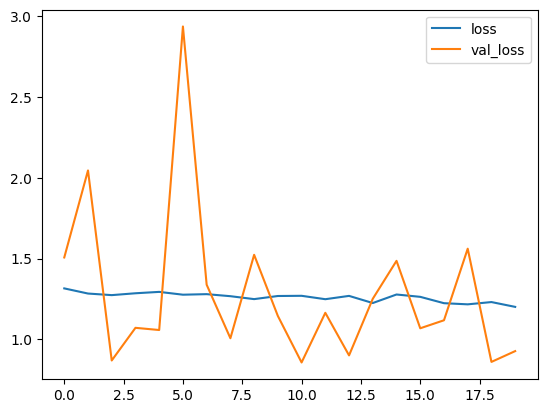

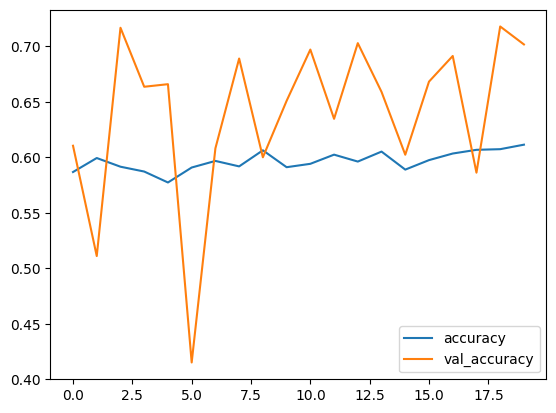

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [ ]:
model.save("/content/drive/My Drive/Latihan_AI/final_mode_2.keras") # Lihat foldernya

# Test model

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/My Drive/Latihan_AI/final_model.keras", compile=False) # Lihat foldernya

In [ ]:
uploaded = files.upload()
img_path = next(iter(uploaded))

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Test Image")
plt.show()

In [ ]:
pred = model.predict(img_array)
predicted_class_index = np.argmax(pred)

class_indices = train_generator.class_indices
labels = dict((v, k) for k, v in class_indices.items())

latin_leaf_name = labels[predicted_class_index]
genome_ = ["Angiospermae", "Gymnospermae"][latin_leaf_name in gymnospermae]
print(f"Predicted: {latin_leaf_name.replace('_', ' ').title()} in the genome group {genome_}")